In [2]:
!pip install wordcloud

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 368kB 1.2MB/s eta 0:00:01


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

from wordcloud import WordCloud

%matplotlib inline

In [4]:
movie_path = "tmdb_5000_movies.csv"
credit_path = "tmdb_5000_credits.csv"

In [5]:
movies = pd.read_csv(movie_path)
credits = pd.read_csv(credit_path)

In [6]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
del credits['title']
total = pd.merge(movies, credits, left_on='id', right_on='movie_id', how='left')
total.drop([
    'homepage', 'original_language', 'overview', 
    'spoken_languages', 'status','tagline', 'movie_id', 'cast'
], axis=1, inplace=True)

In [8]:
total.shape

(4803, 15)

In [9]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 15 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_title          4803 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
crew                    4803 non-null object
dtypes: float64(3), int64(4), object(8)
memory usage: 600.4+ KB


In [10]:
plt.style.use("ggplot")

total[total.release_date.isnull()]

,budget,genres,id,keywords,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,crew
4553,0,[],380097,[],America Is Still the Place,0.0,[],[],NaN,0,0.0,America Is Still the Place,0.0,0,[]


In [11]:
total.release_date = total.release_date.fillna("2014-06-01")

In [12]:
total[total.runtime.isnull()]

,budget,genres,id,keywords,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,crew
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",Chiamatemi Francesco - Il Papa della gente,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12,"[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...","To Be Frank, Sinatra at 100",0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,"To Be Frank, Sinatra at 100",0.0,0,"[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."


In [13]:
total.runtime = total.runtime.fillna(94, limit=1)
total.runtime = total.runtime.fillna(240, limit=1)

In [14]:
total.release_date = pd.to_datetime(total.release_date, format="%Y-%m-%d", errors="coerce").dt.year

In [15]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 15 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_title          4803 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4803 non-null int64
revenue                 4803 non-null int64
runtime                 4803 non-null float64
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
crew                    4803 non-null object
dtypes: float64(3), int64(5), object(7)
memory usage: 600.4+ KB


In [16]:
json_columns = ['genres', 'keywords', 'production_companies', 'production_countries']
for column in json_columns:
    total[column] = total[column].map(json.loads)

def get_name(x):
    list = []
    for i in x:
        list.append(i['name'])
    return '|'.join(list)

for column in json_columns:
    total[column] = total[column].map(get_name)
    
total.head()

,budget,genres,id,keywords,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,crew
0,237000000,Action|Adventure|Fantasy|Science Fiction,19995,culture clash|future|space war|space colony|so...,Avatar,150.437577,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,2009,2787965087,162.0,Avatar,7.2,11800,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,Adventure|Fantasy|Action,285,ocean|drug abuse|exotic island|east india trad...,Pirates of the Caribbean: At World's End,139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,United States of America,2007,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,Action|Adventure|Crime,206647,spy|based on novel|secret agent|sequel|mi6|bri...,Spectre,107.376788,Columbia Pictures|Danjaq|B24,United Kingdom|United States of America,2015,880674609,148.0,Spectre,6.3,4466,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,Action|Crime|Drama|Thriller,49026,dc comics|crime fighter|terrorist|secret ident...,The Dark Knight Rises,112.312950,Legendary Pictures|Warner Bros.|DC Entertainme...,United States of America,2012,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,Action|Adventure|Science Fiction,49529,based on novel|mars|medallion|space travel|pri...,John Carter,43.926995,Walt Disney Pictures,United States of America,2012,284139100,132.0,John Carter,6.1,2124,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [17]:
genre_set = set()
for x in total['genres']:
    genre_set.update(x.split('|'))
genre_set.discard("")

print(genre_set)

{'Foreign', 'Adventure', 'Drama', 'History', 'Horror', 'Comedy', 'Crime', 'Family', 'Thriller', 'Western', 'Science Fiction', 'Animation', 'TV Movie', 'Documentary', 'Action', 'Romance', 'Fantasy', 'War', 'Mystery', 'Music'}


In [18]:
genre_df = pd.DataFrame()
for genre in genre_set:
    genre_df[genre] = total['genres'].str.contains(genre).map(lambda x: 1 if x else 0)
genre_df.head()

,Foreign,Adventure,Drama,History,Horror,Comedy,Crime,Family,Thriller,Western,Science Fiction,Animation,TV Movie,Documentary,Action,Romance,Fantasy,War,Mystery,Music
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [19]:
genre_df['release_date'] = total['release_date']
genre_by_year = genre_df.groupby('release_date').sum()
genre_by_year.head()

,Foreign,Adventure,Drama,History,Horror,Comedy,Crime,Family,Thriller,Western,Science Fiction,Animation,TV Movie,Documentary,Action,Romance,Fantasy,War,Mystery,Music
release_date,,,,,,,,,,,,,,,,,,,,
1916,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1925,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1927,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1929,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,1
1930,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Text(0, 0.5, '数量')

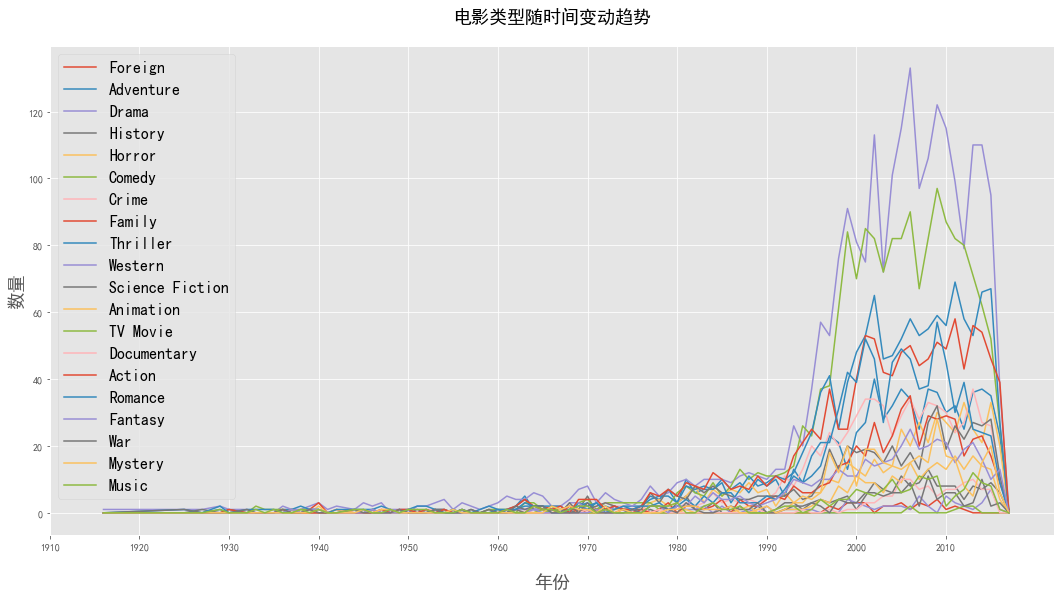

In [20]:

plt.rcParams['font.sans-serif'] = ['SimHei']
fig = plt.figure(figsize=(18,9))
plt.plot(genre_by_year, label=genre_by_year.columns)
plt.legend(genre_by_year, fontsize=16)
plt.xticks(range(1910, 2018, 10))
plt.title("电影类型随时间变动趋势\n", fontsize=18)
plt.xlabel("\n年份", fontsize=18)
plt.ylabel("数量", fontsize=18)

In [21]:
genre_sum = genre_by_year.sum().sort_values(ascending=True)
genre_sum

TV Movie              8
Foreign              34
Western              82
Documentary         110
War                 144
Music               185
History             197
Animation           234
Mystery             348
Fantasy             424
Family              513
Horror              519
Science Fiction     535
Crime               696
Adventure           790
Romance             894
Action             1154
Thriller           1274
Comedy             1722
Drama              2297
dtype: int64

Text(0, 0.5, '类型')

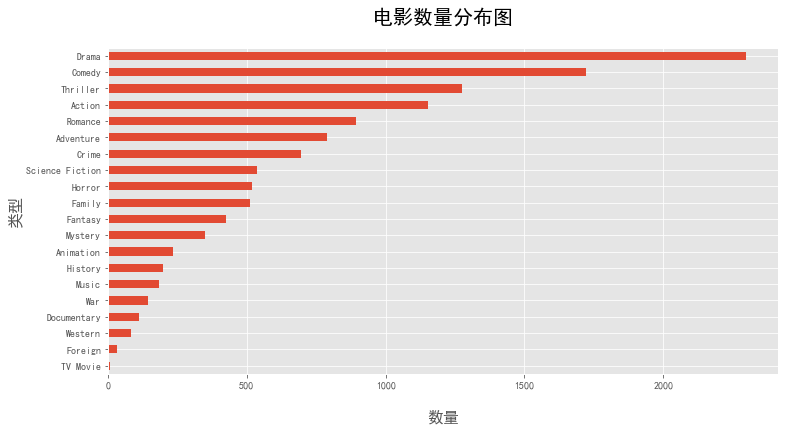

In [22]:
genre_sum.plot.barh(label='genre', figsize=(12, 6))
plt.title("电影数量分布图\n", fontsize=20)
plt.xlabel("\n数量", fontsize=16)
plt.ylabel("类型", fontsize=16)

In [23]:
profit_df = pd.DataFrame()
total['profit'] = total.revenue-total.budget

# genre_df.iloc[:, :-1] 表示拿掉了release_date
profit_df = pd.concat([genre_df.iloc[:, :-1], total.profit], axis=1)
profit_by_genre = pd.Series(index=genre_set)

for genre in genre_set:
    profit_by_genre[genre] = profit_df.groupby(genre, as_index=False).profit.mean().loc[1, 'profit']

profit_by_genre

Foreign           -2.934369e+05
Adventure          1.423333e+08
Drama              3.143791e+07
History            2.762010e+07
Horror             2.897105e+07
Comedy             4.597608e+07
Crime              3.830085e+07
Family             1.116260e+08
Thriller           4.907608e+07
Western            1.916726e+07
Science Fiction    1.005910e+08
Animation          1.592271e+08
TV Movie          -1.150000e+06
Documentary        7.185600e+06
Action             8.970235e+07
Romance            3.969103e+07
Fantasy            1.297936e+08
War                4.887342e+07
Mystery            4.755644e+07
Music              3.254800e+07
dtype: float64

Text(0, 0.5, '类型')

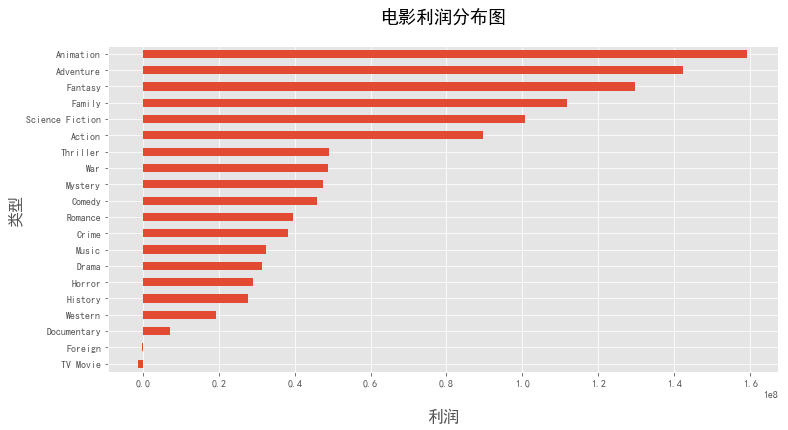

In [24]:
profit_by_genre.sort_values().plot.barh(label='genre', figsize=(12, 6))
plt.title("电影利润分布图\n", fontsize=18)
plt.xlabel("\n利润", fontsize=16)
plt.ylabel("类型", fontsize=16)

In [25]:
original_recompose = pd.DataFrame()

original_recompose['type'] = total.keywords.str.contains("based on novel").map(lambda x: 1 if x else 0)
count_list = original_recompose.groupby('type').type.count()
original_recompose['profit'] = total.profit
original_recompose['budget'] = total.budget

In [26]:
original_recompose = original_recompose.groupby('type').mean()
original_recompose['count'] = count_list
original_recompose['profit_rate'] = original_recompose.profit / original_recompose.budget
original_recompose.rename(index={0: 'original', 1:'recompose'}, inplace=True)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

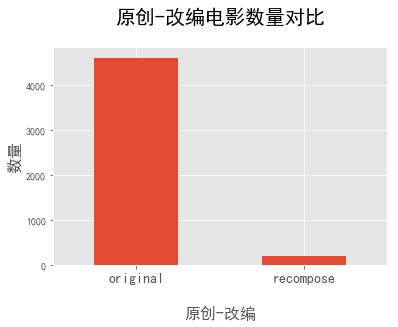

In [27]:
plt.figure()
original_recompose.loc[original_recompose.index, 'count'].plot.bar()
plt.title("原创-改编电影数量对比\n", fontsize=20)
plt.xlabel("\n原创-改编", fontsize=16)
plt.ylabel("数量", fontsize=16)
plt.xticks(fontsize=14, rotation=0)

No handles with labels found to put in legend.


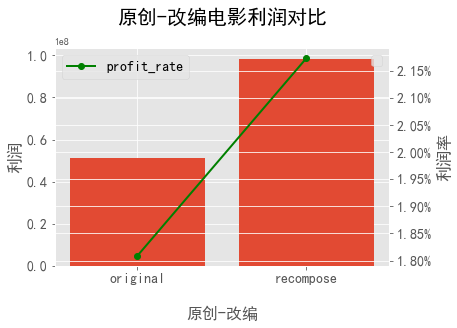

In [28]:
x = list(range(len(original_recompose.index)))
xl = original_recompose.index

fig = plt.figure()
ax1 = fig.add_subplot(111)

plt.bar(x, original_recompose['profit'])
plt.xticks(x, xl, rotation=0, fontsize=14)
plt.yticks(fontsize=14)

ax1.set_title("原创-改编电影利润对比\n", fontsize=20)
ax1.set_xlabel("\n原创-改编", fontsize=16)
ax1.set_ylabel("利润", fontsize=16)
ax1.legend(fontsize=14, loc=1)

import matplotlib.ticker as mtick
ax2 = ax1.twinx()
ax2.plot(x, original_recompose['profit_rate'], 'go-', lw=2)
fmt = "%.2f%%"
yticks = mtick.FormatStrFormatter(fmt)
ax2.yaxis.set_major_formatter(yticks)
plt.yticks(fontsize=14)
ax2.set_ylabel("利润率", fontsize=16)
ax2.legend(loc=2, fontsize=14)

In [29]:
# json_columns = ['genres', 'keywords', 'production_companies', 'production_countries']
# json_data = pd.DataFrame()

# for column in json_columns:
#     column_data = total[column].map(lambda x: x.split('|'))
    
#     column_lens = column_data.apply(len)
#     max_column_len = max(column_lens)
#     for i in range(max_column_len):
#         column_name = column + "_" + str(i)
#         json_data[column_name] = None
    
#     for i, column_len in enumerate(column_lens):
#         for j in range(column_len):
#             column_name = column + "_" + str(j)
#             json_data.loc[i, column_name] = column_data[i][j]

# total_bk = total.copy()
# for column in json_columns:
#     del total_bk[column]
# data_sq = pd.concat([total_bk, json_data], axis=1)
# data_sq.to_csv("movies-credits-3.csv", index=False)

In [30]:
country_set = set()
for x in total['production_countries']:
    country_set.update(x.split('|'))

country_set.discard("")

country_df = pd.DataFrame()

for country in country_set:
    country_df[country] = total['production_countries'].str.contains(country).map(lambda x: 1 if x else 0)

country_df = country_df.sum().sort_values(ascending=False)
country_df

United States of America    3956
United Kingdom               636
Germany                      324
France                       306
Canada                       261
Australia                    110
Italy                         72
Spain                         71
China                         59
Japan                         58
India                         54
Hong Kong                     48
Ireland                       37
Mexico                        30
New Zealand                   28
Belgium                       25
Czech Republic                24
South Africa                  20
Denmark                       20
Switzerland                   19
Sweden                        19
Russia                        19
Netherlands                   18
South Korea                   18
United Arab Emirates          14
Norway                        14
Brazil                        13
Hungary                       13
Romania                       12
Luxembourg                    11
          

Text(0.5, 1.0, '电影产地分布图')

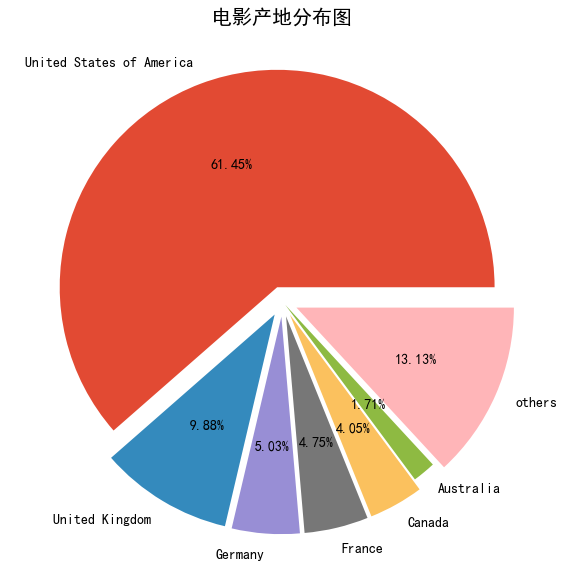

In [31]:
rate = country_df / country_df.sum()

others = 0.015
rate1 = rate[rate >= others]
rate1['others'] = rate[rate < others].sum()
explode = (rate1 >= 0.04) / 20 + 0.02

rate1.plot.pie(autopct="%1.2f%%", figsize=(10, 10), explode=explode, label="", fontsize=14)
plt.title("电影产地分布图", fontsize=20)

In [32]:
keywords_list = []

list1 = []
for x in total['keywords']:
    keywords_list.append(x)

keywords_list = '|'.join(keywords_list)
keywords_list = keywords_list.replace('\'s', '')

In [33]:
wordcloud = WordCloud(background_color='white', max_words=2000, scale=1.5).generate(keywords_list)

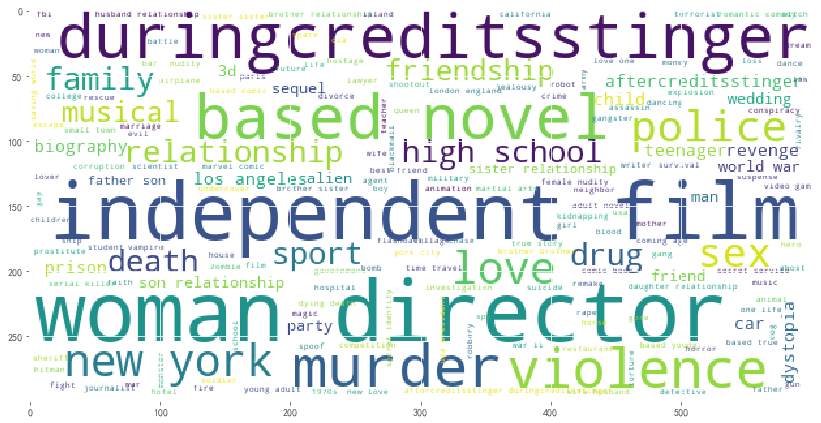

In [34]:
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud)

In [35]:
popular_genre_df = pd.DataFrame()
popular_genre_df = pd.concat([genre_df.iloc[:, :-1], total.popularity], axis=1)

plist = []

for genre in genre_set:
    plist.append(popular_genre_df.groupby(genre, as_index=False).popularity.mean().loc[1, 'popularity'])

popular_by_genre = pd.DataFrame(index=genre_set)
popular_by_genre['popular_mean'] = plist
popular_by_genre

,popular_mean
Foreign,0.686787
Adventure,39.268042
Drama,17.764853
History,17.444839
Horror,18.295915
Comedy,18.221001
Crime,22.853274
Family,27.832849
Thriller,24.460077
Western,18.236279


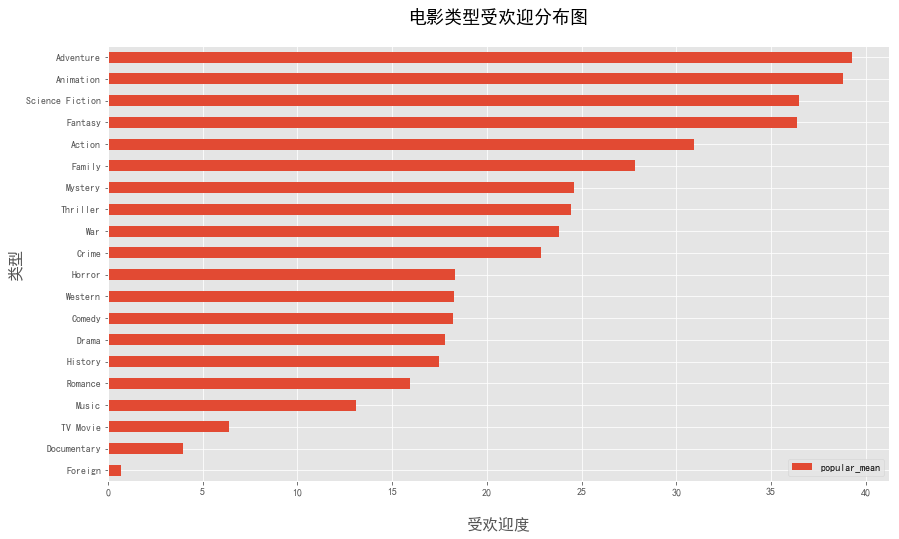

In [36]:
popular_by_genre.sort_values(by='popular_mean').plot.barh(label='genre', figsize=(14, 8))
plt.title("电影类型受欢迎分布图\n", fontsize=18)
plt.xlabel("\n受欢迎度", fontsize=16)
plt.ylabel("类型", fontsize=16)
plt.show()

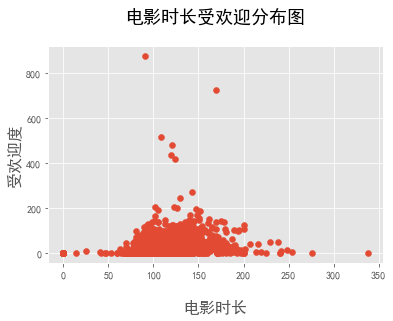

In [37]:
plt.scatter(total.runtime, total.popularity)
plt.title("电影时长受欢迎分布图\n", fontsize=18)
plt.xlabel("\n电影时长", fontsize=16)
plt.ylabel("受欢迎度", fontsize=16)
plt.show()

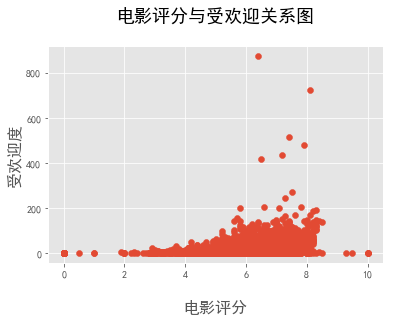

In [38]:
plt.scatter(total.vote_average, total.popularity)
plt.title("电影评分与受欢迎关系图\n", fontsize=18)
plt.xlabel("\n电影评分", fontsize=16)
plt.ylabel("受欢迎度", fontsize=16)
plt.show()

In [39]:
company_list = ['Universal Pictures', 'Paramount Pictures']

company_df = pd.DataFrame()

for company in company_list:
    company_df[company] = total.production_companies.str.contains(company).map(lambda x: 1 if x else 0)

company_df = pd.concat([company_df, genre_df.iloc[:, :-1], total.profit], axis=1)
company_df.head()

,Universal Pictures,Paramount Pictures,Foreign,Adventure,Drama,History,Horror,Comedy,Crime,Family,...,Animation,TV Movie,Documentary,Action,Romance,Fantasy,War,Mystery,Music,profit
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,2550965087
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,661000000
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,635674609
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,834939099
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,24139100


In [40]:
plist = []
for company in company_list:
    plist.append(company_df.groupby(company, as_index=False).profit.sum().loc[1, 'profit'])
company_profit = pd.DataFrame(index=company_list)
company_profit['profit_total'] = plist
company_profit

,profit_total
Universal Pictures,28990348596
Paramount Pictures,27568910158


(array([0, 1]), <a list of 2 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

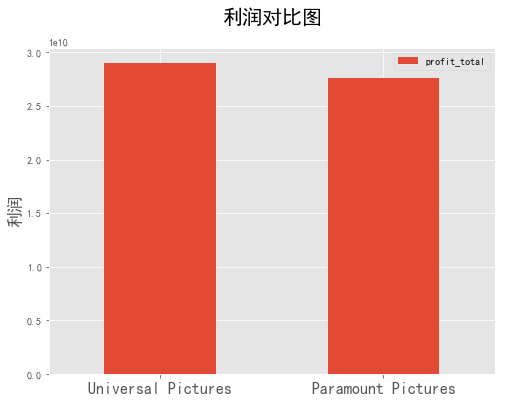

In [41]:
plt.figure()
company_profit.plot.bar(label=company_profit.index, figsize=(8, 6))
plt.title("利润对比图\n", fontsize=20)
plt.ylabel("利润", fontsize=16)
plt.xticks(fontsize=16, rotation=0)

In [42]:
company_genre_df = pd.DataFrame()

for company in company_list:
    company_data = company_df[company_df[company] == 1]
    for i, genre in enumerate(genre_set):
        tmp = company_data.groupby(genre, as_index=False).sum()
        if tmp.shape[0] < 2:
            profit = 0
        else:
            profit = tmp.loc[1, 'profit']
        
        company_genre_df.loc[genre, company] = profit
    


Text(0.5, 1.0, 'Paramount Pictures')

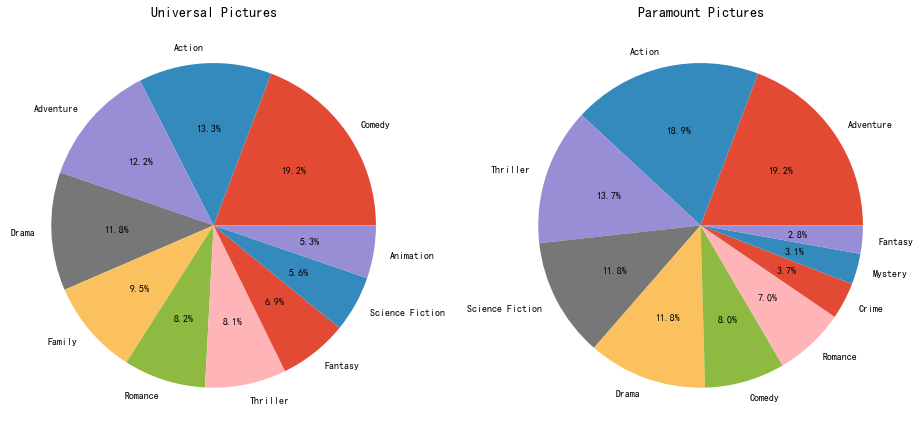

In [43]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(16, 8))

top_nums = 10

company_name = company_list[0]
company_genre_profit = company_genre_df[company_name].sort_values(ascending=False)[:top_nums]
ax1 = fig.add_subplot(1, 2, 1)
plt.pie(company_genre_profit, labels=company_genre_profit.index, autopct="%.1f%%")
plt.title(company_name, fontsize=14)

company_name = company_list[1]
company_genre_profit = company_genre_df[company_name].sort_values(ascending=False)[:top_nums]
ax1 = fig.add_subplot(1, 2, 2)
plt.pie(company_genre_profit, labels=company_genre_profit.index, autopct="%.1f%%")
plt.title(company_name, fontsize=14)

In [44]:
total[['budget', 'popularity', 'release_date', 'runtime', 'vote_average', 'vote_count', 'revenue']].corr()

,budget,popularity,release_date,runtime,vote_average,vote_count,revenue
budget,1.000000,0.505414,0.168828,0.268025,0.093146,0.593180,0.730823
popularity,0.505414,1.000000,0.101853,0.223918,0.273952,0.778130,0.644724
release_date,0.168828,0.101853,1.000000,-0.165604,-0.198929,0.114090,0.090084
runtime,0.268025,0.223918,-0.165604,1.000000,0.366283,0.270323,0.249612
vote_average,0.093146,0.273952,-0.198929,0.366283,1.000000,0.312997,0.197150
vote_count,0.593180,0.778130,0.114090,0.270323,0.312997,1.000000,0.781487
revenue,0.730823,0.644724,0.090084,0.249612,0.197150,0.781487,1.000000


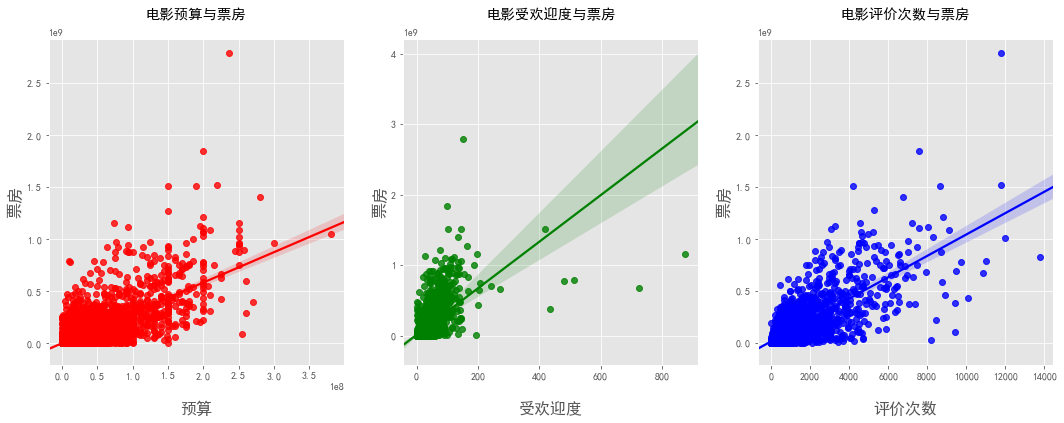

In [45]:
import seaborn as sns 

columns = ['budget', 'popularity','vote_count', 'revenue']
columns_chinese = ['预算', '受欢迎度', '评价次数', '票房']
colors = ['r', 'g', 'b']
revenue_corr = total[columns]

fig, axes = plt.subplots(1, 3,figsize=(18, 6))

for i, ax in enumerate(axes.ravel()):
    sns.regplot(x=columns[i], y=columns[-1], data=revenue_corr, x_jitter=0.1, color=colors[i], ax=ax)
    ax.set_title("电影{}与票房\n".format(columns_chinese[i]))
    ax.set_xlabel("\n" + columns_chinese[i], fontsize=16)
    ax.set_ylabel(columns_chinese[-1], fontsize=16) 

In [46]:
total.head()

,budget,genres,id,keywords,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,crew,profit
0,237000000,Action|Adventure|Fantasy|Science Fiction,19995,culture clash|future|space war|space colony|so...,Avatar,150.437577,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,2009,2787965087,162.0,Avatar,7.2,11800,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2550965087
1,300000000,Adventure|Fantasy|Action,285,ocean|drug abuse|exotic island|east india trad...,Pirates of the Caribbean: At World's End,139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,United States of America,2007,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",661000000
2,245000000,Action|Adventure|Crime,206647,spy|based on novel|secret agent|sequel|mi6|bri...,Spectre,107.376788,Columbia Pictures|Danjaq|B24,United Kingdom|United States of America,2015,880674609,148.0,Spectre,6.3,4466,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",635674609
3,250000000,Action|Crime|Drama|Thriller,49026,dc comics|crime fighter|terrorist|secret ident...,The Dark Knight Rises,112.312950,Legendary Pictures|Warner Bros.|DC Entertainme...,United States of America,2012,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",834939099
4,260000000,Action|Adventure|Science Fiction,49529,based on novel|mars|medallion|space travel|pri...,John Carter,43.926995,Walt Disney Pictures,United States of America,2012,284139100,132.0,John Carter,6.1,2124,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",24139100


In [47]:
total['cast'] = credits['cast'].apply(json.loads)
total.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_title', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'title', 'vote_average', 'vote_count', 'crew',
       'profit', 'cast'],
      dtype='object')

In [48]:
cast_dict = dict()

for casts in total['cast']:
    for cast in casts:
        if cast['id'] not in cast_dict:
            cast_dict[cast['id']] = cast['name']

In [49]:
movie_dict = dict()

sample_nums = total.shape[0]
for i in range(sample_nums):
    movie = total.loc[i]
    if movie['id'] not in movie_dict:
        movie_dict[int(movie['id'])] = movie['original_title']

In [52]:
cast_movie_dict = dict()
movie_cast_dict = dict()

for movie_id in movie_dict:
    movie_cast_dict[str(movie_id)] = []

for cast_id in cast_dict:
    cast_movie_dict[str(cast_id)] = []

In [53]:
for i in range(sample_nums):
    movie = total.loc[i]
    casts = movie['cast']
    for cast in casts:
        cast_id = cast['id']
        movie_id = movie['id']
        cast_movie_dict[str(cast_id)].append(int(movie_id))
        movie_cast_dict[str(movie_id)].append(int(cast_id))

In [54]:
results = dict()
results["movie_cast"] = movie_cast_dict
results["cast_movie"] = cast_movie_dict
results["movie_dict"] = movie_dict
results["cast_dict"] = cast_dict

results_str = json.dumps(results)

with open("./results/movie_output.json", "w") as f:
    print(results_str, file=f)

In [55]:
used_column_names = [
    'id',
    'genres', 'keywords',  
     'production_companies', 'production_countries', 'release_date',
     'original_title', 'popularity',
     'runtime', 'title', 
     'vote_average', 'vote_count',
     'revenue', 'budget', 'profit', 
     'cast'
]

In [56]:
used_data = total[used_column_names]

In [57]:
columns = ['genres', 'keywords',  
     'production_companies', 'production_countries']

for column in columns:
    used_data[column] = used_data[column].apply(lambda x: x.replace('|', ','))

/home/hpyan/.miniconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [58]:
used_data.head()

,id,genres,keywords,production_companies,production_countries,release_date,original_title,popularity,runtime,title,vote_average,vote_count,revenue,budget,profit,cast
0,19995,"Action,Adventure,Fantasy,Science Fiction","culture clash,future,space war,space colony,so...","Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009,Avatar,150.437577,162.0,Avatar,7.2,11800,2787965087,237000000,2550965087,"[{'cast_id': 242, 'character': 'Jake Sully', '..."
1,285,"Adventure,Fantasy,Action","ocean,drug abuse,exotic island,east india trad...","Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007,Pirates of the Caribbean: At World's End,139.082615,169.0,Pirates of the Caribbean: At World's End,6.9,4500,961000000,300000000,661000000,"[{'cast_id': 4, 'character': 'Captain Jack Spa..."
2,206647,"Action,Adventure,Crime","spy,based on novel,secret agent,sequel,mi6,bri...","Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",2015,Spectre,107.376788,148.0,Spectre,6.3,4466,880674609,245000000,635674609,"[{'cast_id': 1, 'character': 'James Bond', 'cr..."
3,49026,"Action,Crime,Drama,Thriller","dc comics,crime fighter,terrorist,secret ident...","Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,2012,The Dark Knight Rises,112.312950,165.0,The Dark Knight Rises,7.6,9106,1084939099,250000000,834939099,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba..."
4,49529,"Action,Adventure,Science Fiction","based on novel,mars,medallion,space travel,pri...",Walt Disney Pictures,United States of America,2012,John Carter,43.926995,132.0,John Carter,6.1,2124,284139100,260000000,24139100,"[{'cast_id': 5, 'character': 'John Carter', 'c..."


In [59]:
used_data_nums = used_data.shape[0]

In [60]:
used_data.columns

Index(['id', 'genres', 'keywords', 'production_companies',
       'production_countries', 'release_date', 'original_title', 'popularity',
       'runtime', 'title', 'vote_average', 'vote_count', 'revenue', 'budget',
       'profit', 'cast'],
      dtype='object')

In [61]:
used_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 16 columns):
id                      4803 non-null int64
genres                  4803 non-null object
keywords                4803 non-null object
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4803 non-null int64
original_title          4803 non-null object
popularity              4803 non-null float64
runtime                 4803 non-null float64
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
revenue                 4803 non-null int64
budget                  4803 non-null int64
profit                  4803 non-null int64
cast                    4803 non-null object
dtypes: float64(3), int64(6), object(7)
memory usage: 797.9+ KB


In [62]:
for column in ['id', 'genres', 'keywords', 'production_companies',
       'production_countries', 'release_date', 'original_title', 'popularity',
       'runtime', 'title', 'vote_average', 'vote_count', 'revenue', 'budget',
       'profit']:
    used_data[column] = used_data[column].astype(str)

/home/hpyan/.miniconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [63]:
cast_detail_dict = {}
for i in range(used_data_nums):
    movie = used_data.loc[i]
    casts = movie['cast']
    for cast in casts:
        cast_id = str(cast['id'])    
        if cast_id not in cast_detail_dict:
            cast_detail_dict[cast_id] = cast

In [64]:
def get_name(cast_list):
    plist = []
    for cast in cast_list:
        plist.append(cast['name'])
    return ','.join(plist)

used_data['cast'] = used_data['cast'].apply(get_name)

/home/hpyan/.miniconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [65]:
used_data['cast'].head()

0    Sam Worthington,Zoe Saldana,Sigourney Weaver,S...
1    Johnny Depp,Orlando Bloom,Keira Knightley,Stel...
2    Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...
3    Christian Bale,Michael Caine,Gary Oldman,Anne ...
4    Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...
Name: cast, dtype: object

In [66]:
movie_detail_dict = {}
for i in range(used_data_nums):
    movie = used_data.loc[i]
    movie_id = str(movie['id'])
    movie_detail_dict[movie_id] = used_data.loc[i].to_dict()

In [67]:
results["movie_detail"] = movie_detail_dict
results["cast_detail"] = cast_detail_dict

results_str = json.dumps(results)

with open("./results/movie_output.json", "w") as f:
    print(results_str, file=f)

In [68]:
def search_movie(keyword):
    for movie_id in movie_dict:
        if movie_dict[movie_id].find(keyword) != -1:
            print("{}: {}".format(movie_id, movie_dict[movie_id]))

In [69]:
search_movie("Titanic")

597: Titanic
24575: Raise the Titanic
115872: La femme de chambre du Titanic


In [70]:
search_movie("Avengers")

99861: Avengers: Age of Ultron
24428: The Avengers


In [71]:
casts

[{'cast_id': 3,
  'character': 'Herself',
  'credit_id': '52fe44e8c3a368484e03da91',
  'gender': 1,
  'id': 69597,
  'name': 'Drew Barrymore',
  'order': 0},
 {'cast_id': 5,
  'character': 'Himself',
  'credit_id': '58ce01169251415a3901648f',
  'gender': 2,
  'id': 85563,
  'name': 'Brian Herzlinger',
  'order': 1},
 {'cast_id': 6,
  'character': 'Himself',
  'credit_id': '58ce01339251415a410167f0',
  'gender': 2,
  'id': 3034,
  'name': 'Corey Feldman',
  'order': 2},
 {'cast_id': 8,
  'character': 'Himself',
  'credit_id': '58ce018c9251415a7d016e36',
  'gender': 2,
  'id': 21315,
  'name': 'Eric Roberts',
  'order': 3},
 {'cast_id': 9,
  'character': 'Himself',
  'credit_id': '58ce01b99251415a7d016e7d',
  'gender': 0,
  'id': 2171,
  'name': 'Griffin Dunne',
  'order': 4},
 {'cast_id': 10,
  'character': 'Himself',
  'credit_id': '58ce01d19251415a8b0168be',
  'gender': 2,
  'id': 2231,
  'name': 'Samuel L. Jackson',
  'order': 5},
 {'cast_id': 11,
  'character': 'Himself',
  'credit_

In [73]:
print(len(cast_dict))

54588
